# Pre Processing

In [1]:
# Step 1: Set up the environment and import necessary libraries
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

In [2]:
df = pd.read_csv('C:\\Users\\chris\\OneDrive\\Desktop\\Github\\KAN\\DataCoSupplyChainDataset.csv', header=0, encoding='unicode_escape')

In [3]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [4]:
df.shape

(180519, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
df['Cust_Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [8]:
df.select_dtypes(include=['object']).describe()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode,Cust_Full_Name
count,180519,180519,180519,180519,180519,180519,180519,180511,180519,180519,...,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,4,4,50,563,2,1,782,1109,1,3,...,164,65752,23,1089,9,118,118,63701,4,14033
top,DEBIT,Late delivery,Cleats,Caguas,EE. UU.,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Estados Unidos,12/14/2016 12:29,Central America,Inglaterra,COMPLETE,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,1/5/2016 5:58,Standard Class,MarySmith
freq,69295,98977,24551,66770,111146,180519,65150,64104,180519,93504,...,24840,5,28341,6722,59491,24515,24515,10,107752,23884


# Data Cleaning

In [9]:

# Drop unnecessary columns
data = df.drop(['Customer Email', 'Product Status', 'Customer Password', 'Customer Street', 'Customer Fname',
                'Customer Lname', 'Latitude', 'Longitude', 'Product Description', 'Product Image', 'Order Zipcode',
                'shipping date (DateOrders)'], axis=1)


In [10]:

# Drop rows with missing values in 'Product Price' and 'Shipping Mode'
data = data.dropna(subset=['Product Price', 'Shipping Mode'])

In [11]:
#using order date to get the date in year month week and hrs.

data['order date (DateOrders)'].head()


## Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

# Visulizations 

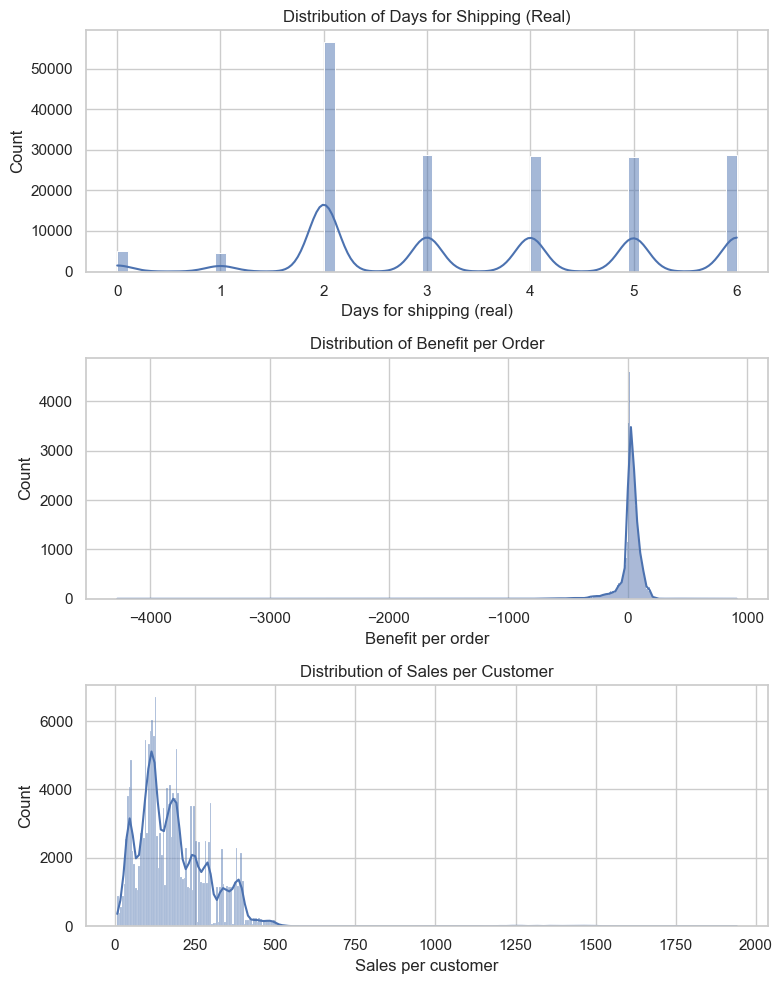

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for the plots
sns.set(style="whitegrid")

# Step 1: Distribution of Key Numerical Variables
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Histogram of Days for shipping (real)
sns.histplot(data, x='Days for shipping (real)', kde=True, ax=axs[0])
axs[0].set_title('Distribution of Days for Shipping (Real)')

# Histogram of Benefit per order
sns.histplot(data, x='Benefit per order', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Benefit per Order')

# Histogram of Sales per Customer
sns.histplot(data, x='Sales per customer', kde=True, ax=axs[2])
axs[2].set_title('Distribution of Sales per Customer')

# Step 2: Categorical Data Analysis (in subsequent cells due to plot size considerations)
plt.tight_layout()
plt.show()


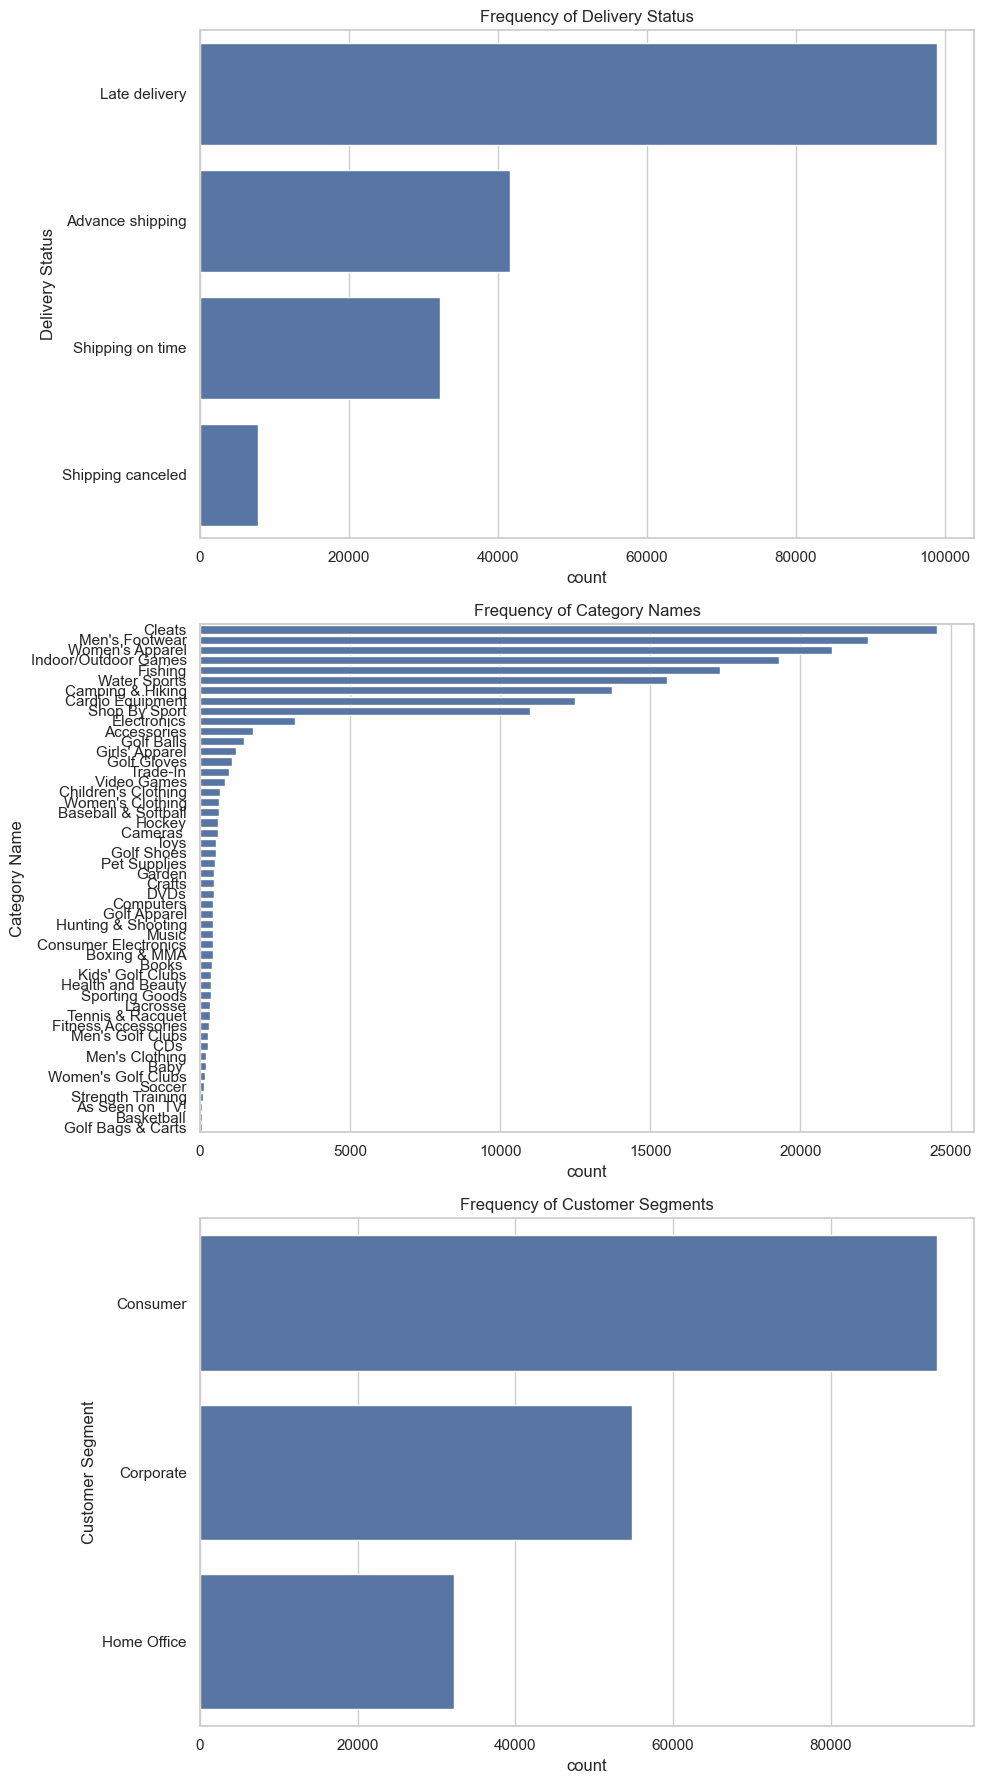

In [13]:
#  Categorical Data Analysis
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Bar plot of Delivery Status
sns.countplot(data, y='Delivery Status', order=data['Delivery Status'].value_counts().index, ax=axs[0])
axs[0].set_title('Frequency of Delivery Status')

# Bar plot of Category Name
sns.countplot(data, y='Category Name',  order=data['Category Name'].value_counts().index, ax=axs[1])
axs[1].set_title('Frequency of Category Names')

# Bar plot of Customer Segment
sns.countplot(data, y='Customer Segment',  order=data['Customer Segment'].value_counts().index, ax=axs[2])
axs[2].set_title('Frequency of Customer Segments')

plt.tight_layout()
plt.show()


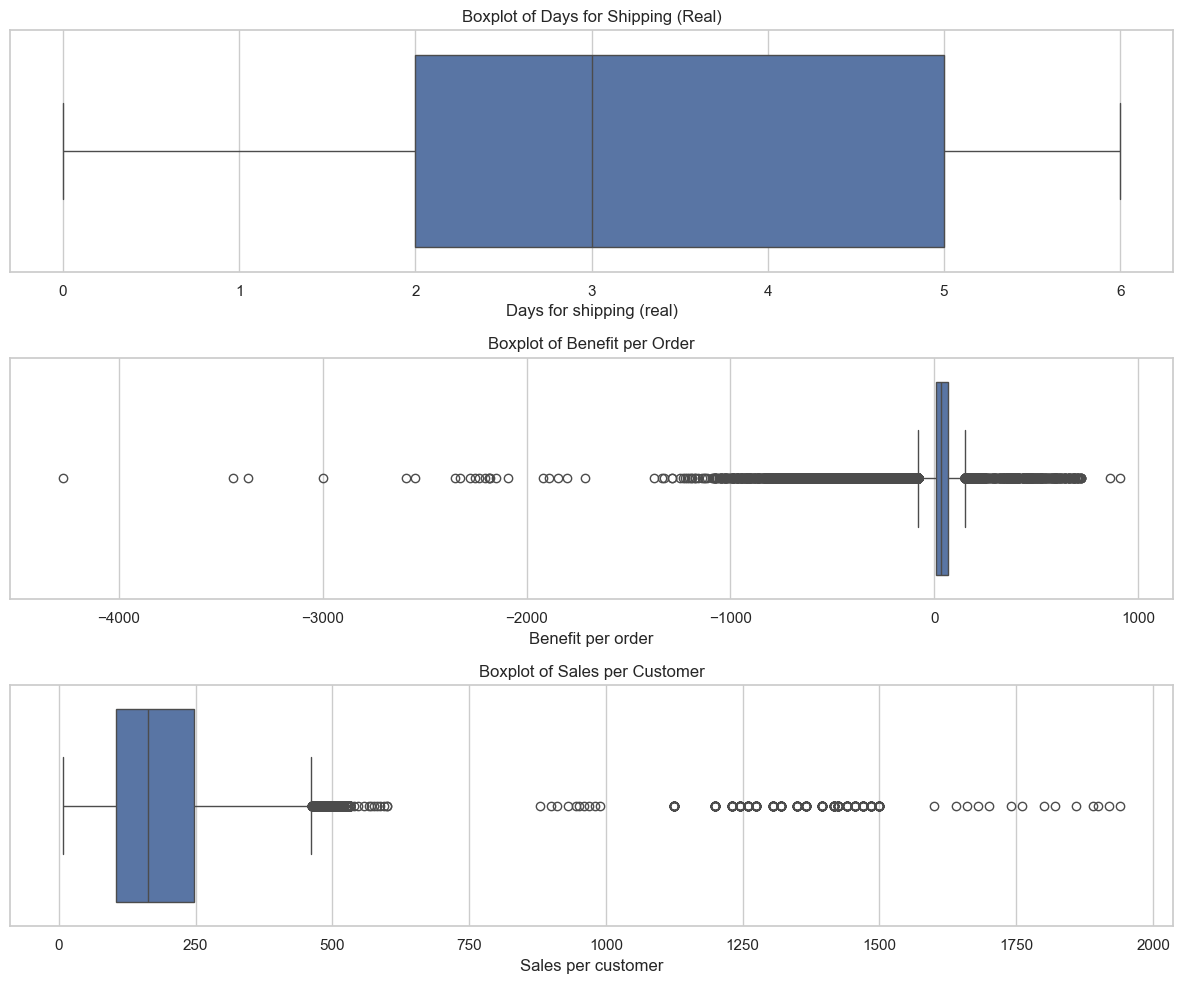

In [14]:
#  Outliers Detection
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Boxplot for Days for shipping (real)
sns.boxplot(data, x='Days for shipping (real)', ax=axs[0])
axs[0].set_title('Boxplot of Days for Shipping (Real)')

# Boxplot for Benefit per order
sns.boxplot(data, x='Benefit per order', ax=axs[1])
axs[1].set_title('Boxplot of Benefit per Order')

# Boxplot for Sales per customer
sns.boxplot(data, x='Sales per customer', ax=axs[2])
axs[2].set_title('Boxplot of Sales per Customer')

plt.tight_layout()
plt.show()

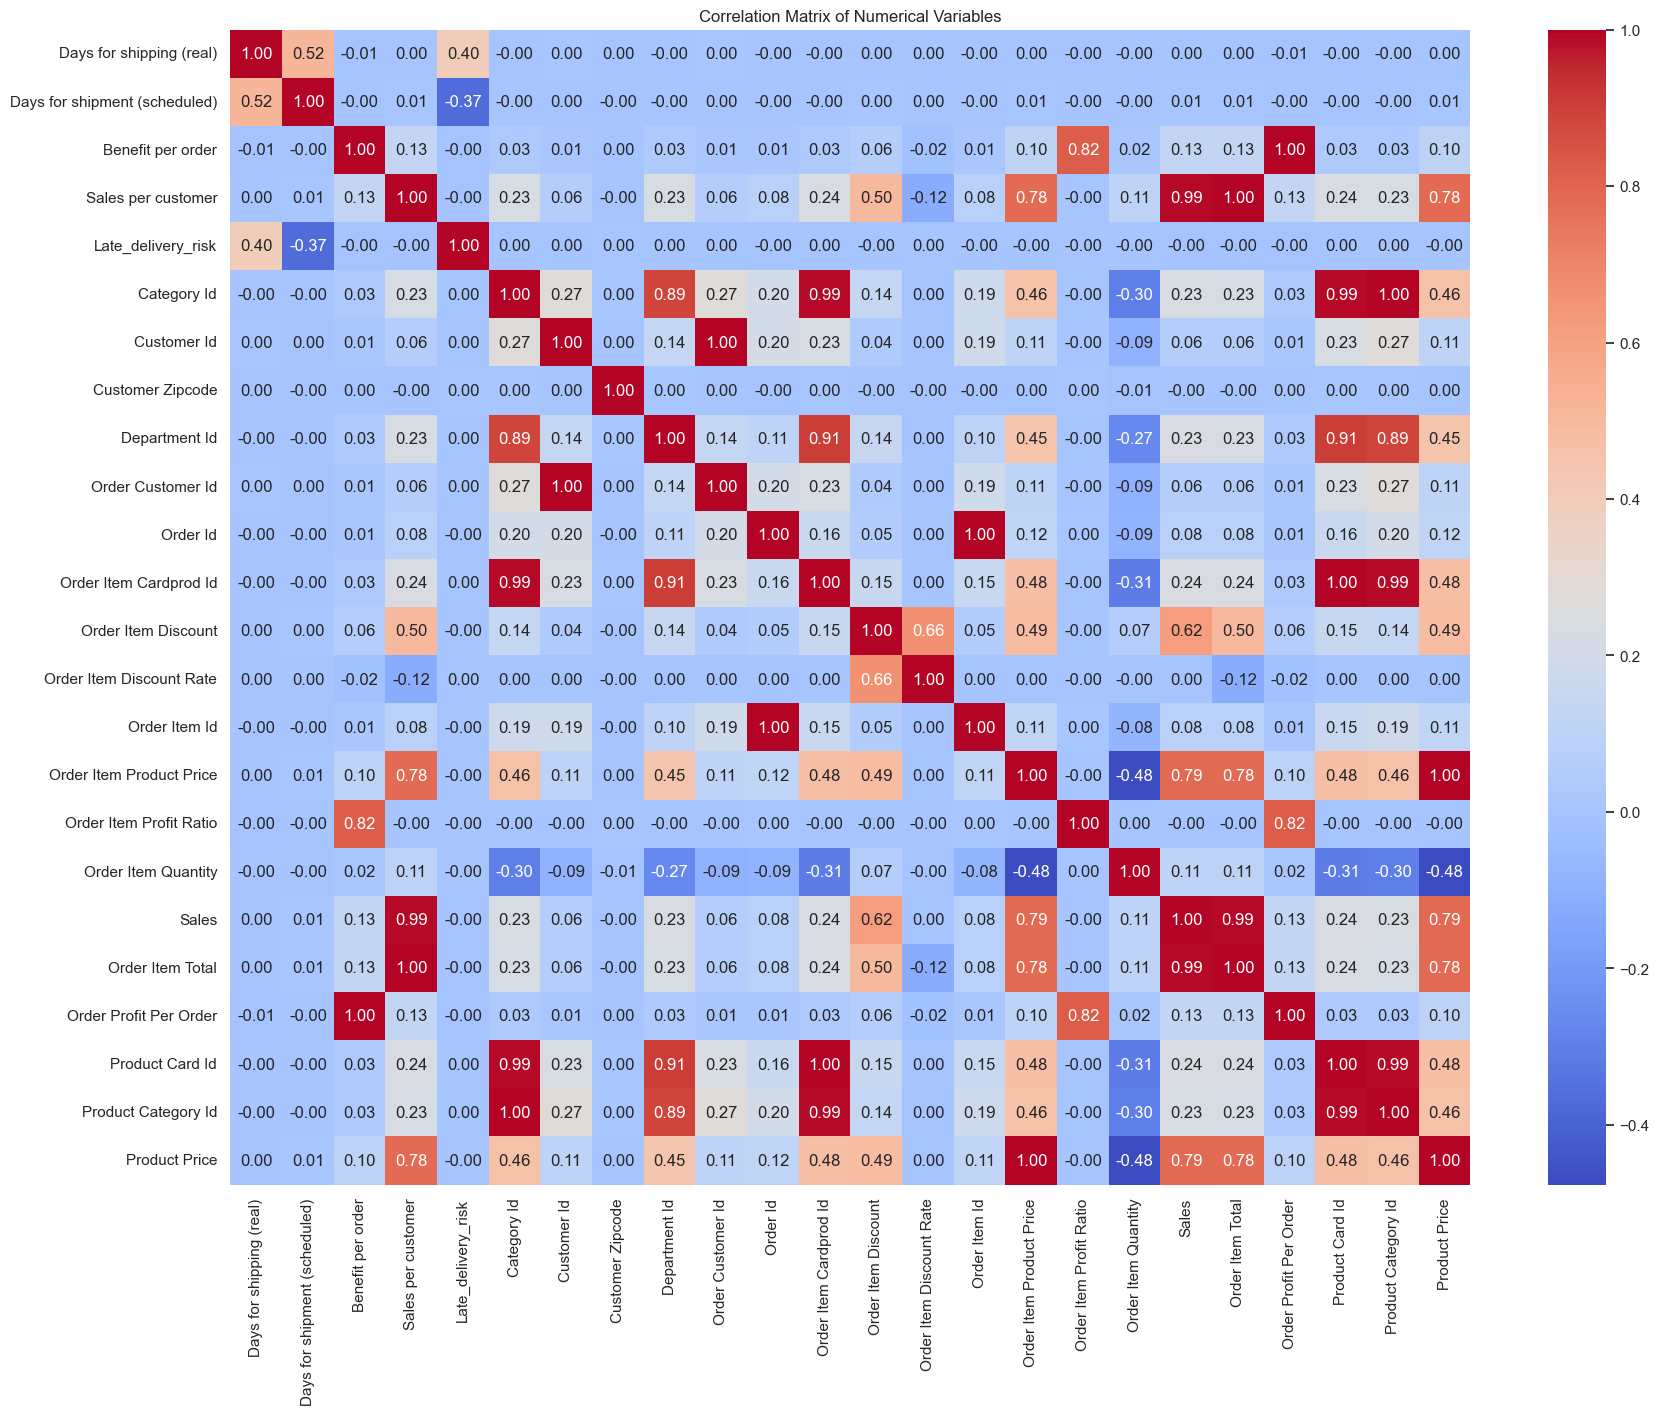

In [15]:
# Correlation Matrix
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [16]:
# We will create a baseline for loss if the Benifit per order is less than 0

loss = data[data['Benefit per order']<0]

In [17]:
loss['Category Name'].value_counts().nlargest(10)


Category Name
Cleats                  4590
Men's Footwear          4169
Women's Apparel         3923
Indoor/Outdoor Games    3617
Fishing                 3209
Water Sports            2924
Camping & Hiking        2590
Cardio Equipment        2332
Shop By Sport           2154
Electronics              562
Name: count, dtype: int64

In [18]:
loss['Market'].value_counts().nlargest(10)


Market
LATAM           9588
Europe          9420
Pacific Asia    7806
USCA            4812
Africa          2158
Name: count, dtype: int64

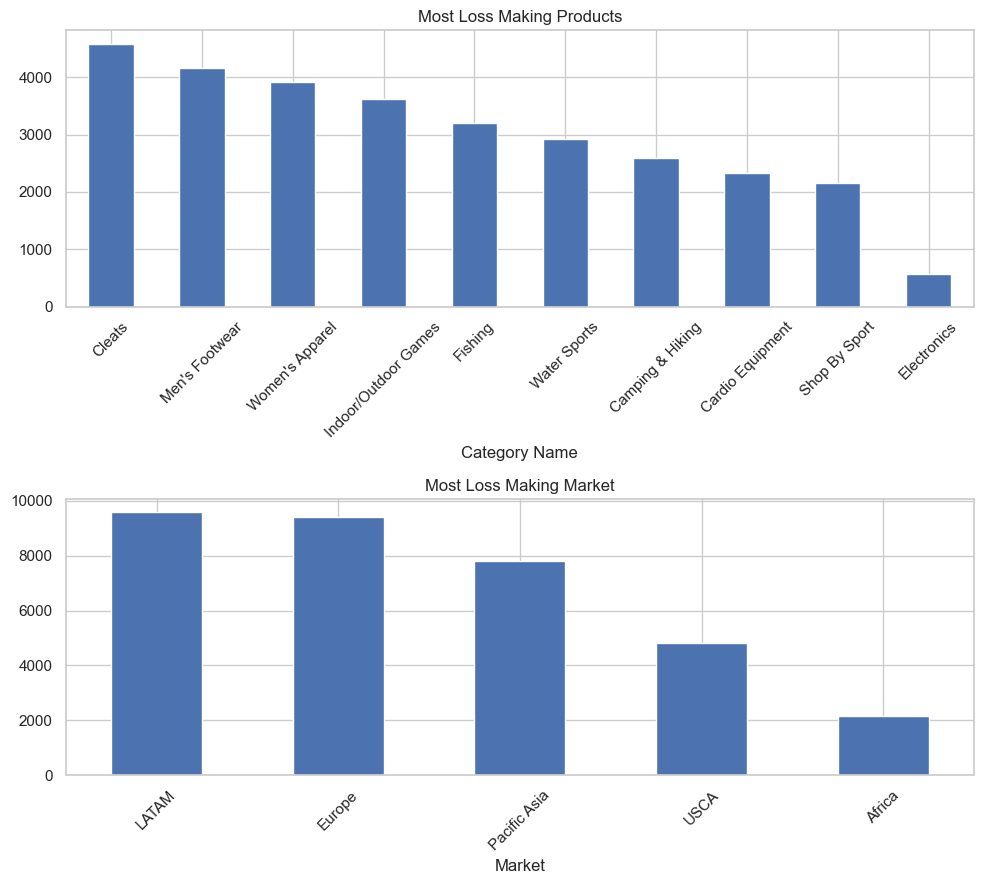

In [19]:
# Setting up the figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 9))  # Adjusting the size for better visibility

# Plotting the Most Loss Making Products
loss['Category Name'].value_counts().nlargest(10).plot.bar(ax=axs[0])
axs[0].set_title("Most Loss Making Products")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)


# Plotting the Most Loss Making Markets
loss['Market'].value_counts().nlargest(10).plot.bar(ax=axs[1])
axs[1].set_title("Most Loss Making Market")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [20]:
# Grouping order status by payment type

status = data.groupby('Type')['Order Status'].value_counts()

status_df = pd.DataFrame(status)

status_df

count
Type     Order Status          
CASH     CLOSED           19616
DEBIT    COMPLETE         59491
         ON_HOLD           9804
PAYMENT  PENDING_PAYMENT  39832
         PAYMENT_REVIEW    1893
TRANSFER PROCESSING       21902
         PENDING          20227
         SUSPECTED_FRAUD   4062
         CANCELED          3692

In [21]:
# Now using the suspected fraud to know the products with most fraud cases

fraud_region = data[data['Order Status'] == 'SUSPECTED_FRAUD']

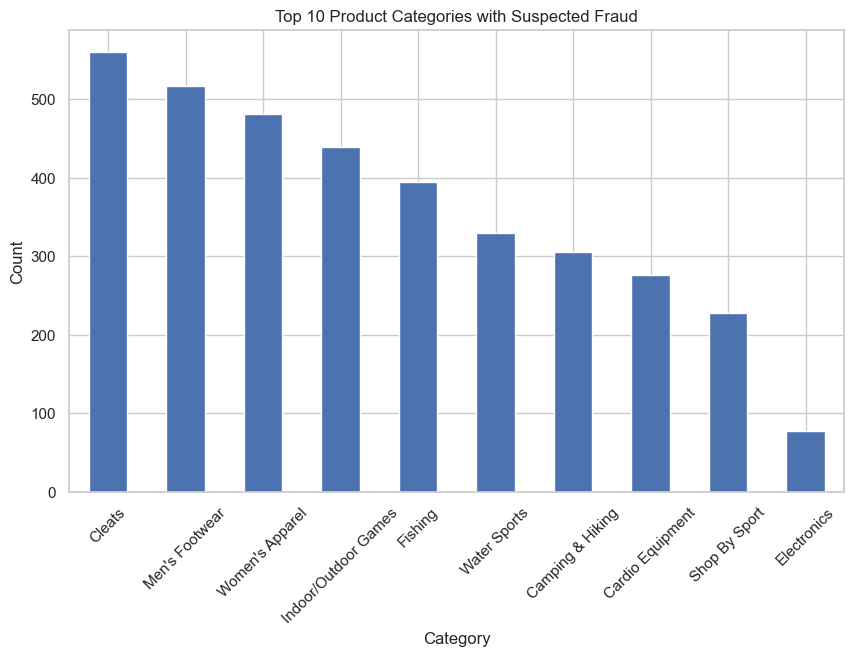

In [22]:
# Getting the counts of the top 10 categories
temp = fraud_region['Category Name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))  # Setting the figure size

# Creating the bar plot
temp.plot(kind='bar')

# Adding titles and labels
plt.title('Top 10 Product Categories with Suspected Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating the x-ticks for better readability

# Displaying the plot
plt.show()

# Prepping Data for Modeling

since our dataset is so huge and it takes a lot of compute I reducing the dataset to a smaller size this is due to the lack of compute but I tried to capture maximum amount of information in this smaller dataset 

In [23]:
data = data.sample(n=500, random_state=45)

In [24]:
# Create a 'flagged' column for suspected fraud

data['flagged'] = np.where(
    (data['Order Status'] == 'SUSPECTED_FRAUD') | 
    ((data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Delivery Status'] == 'Late delivery')), 1, 0
)


# Drop rows with missing values in 'Customer Zipcode'
data = data.dropna(subset=['Customer Zipcode'])


In [25]:
data.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,flagged
24058,CASH,6,4,24.290001,80.970001,Late delivery,1,44,Hunting & Shooting,Buffalo,...,Caribbean,Santiago de Chile,CLOSED,977,44,ENO Atlas Hammock Straps,29.990000,Standard Class,MaryMoss,0
112001,DEBIT,2,2,19.540001,84.970001,Shipping on time,0,46,Indoor/Outdoor Games,Caguas,...,East Africa,Copperbelt,COMPLETE,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Second Class,JonathanWilson,0
10807,TRANSFER,2,1,2.630000,21.000000,Late delivery,1,26,Girls' Apparel,Caguas,...,Central America,Chiriquí,PENDING,567,26,adidas Men's Germany Black Crest Away Tee,25.000000,First Class,DebraSnow,0
112851,PAYMENT,2,1,-20.990000,167.929993,Late delivery,1,46,Indoor/Outdoor Games,Washington,...,West Asia,Estambul,PENDING_PAYMENT,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,First Class,MarySmith,0
140846,CASH,6,4,79.370003,283.480011,Late delivery,1,43,Camping & Hiking,Caguas,...,East of USA,Pensilvania,CLOSED,957,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,BobbyCrawford,0


In [26]:
data.tail(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,flagged
106855,DEBIT,2,4,23.750000,87.959999,Advance shipping,0,46,Indoor/Outdoor Games,Caguas,...,Central America,San Luis Potosí,COMPLETE,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Standard Class,MarySmith,0
27287,DEBIT,3,4,47.590000,135.970001,Advance shipping,0,29,Shop By Sport,Cleveland,...,Oceania,Bay of Plenty,COMPLETE,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Standard Class,DorothyMerritt,0
54022,DEBIT,4,2,42.000000,149.990005,Late delivery,1,48,Water Sports,Wyoming,...,Northern Europe,Inglaterra,COMPLETE,1073,48,Pelican Sunstream 100 Kayak,199.990005,Second Class,AnnaSmith,0
56826,DEBIT,5,4,53.549999,127.500000,Late delivery,1,24,Women's Apparel,Caguas,...,Oceania,Victoria,COMPLETE,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Standard Class,MatthewNorman,0
80251,DEBIT,2,4,-270.589996,163.990005,Advance shipping,0,48,Water Sports,Caguas,...,Oceania,Queensland,COMPLETE,1073,48,Pelican Sunstream 100 Kayak,199.990005,Standard Class,RobertSmith,0


In [27]:
data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Cust_Full_Name,flagged
24058,CASH,6,4,24.290001,80.970001,Late delivery,1,44,Hunting & Shooting,Buffalo,...,Caribbean,Santiago de Chile,CLOSED,977,44,ENO Atlas Hammock Straps,29.990000,Standard Class,MaryMoss,0
112001,DEBIT,2,2,19.540001,84.970001,Shipping on time,0,46,Indoor/Outdoor Games,Caguas,...,East Africa,Copperbelt,COMPLETE,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Second Class,JonathanWilson,0
10807,TRANSFER,2,1,2.630000,21.000000,Late delivery,1,26,Girls' Apparel,Caguas,...,Central America,Chiriquí,PENDING,567,26,adidas Men's Germany Black Crest Away Tee,25.000000,First Class,DebraSnow,0
112851,PAYMENT,2,1,-20.990000,167.929993,Late delivery,1,46,Indoor/Outdoor Games,Washington,...,West Asia,Estambul,PENDING_PAYMENT,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,First Class,MarySmith,0
140846,CASH,6,4,79.370003,283.480011,Late delivery,1,43,Camping & Hiking,Caguas,...,East of USA,Pensilvania,CLOSED,957,43,Diamondback Women's Serene Classic Comfort Bi,299.980011,Standard Class,BobbyCrawford,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106855,DEBIT,2,4,23.750000,87.959999,Advance shipping,0,46,Indoor/Outdoor Games,Caguas,...,Central America,San Luis Potosí,COMPLETE,1014,46,O'Brien Men's Neoprene Life Vest,49.980000,Standard Class,MarySmith,0
27287,DEBIT,3,4,47.590000,135.970001,Advance shipping,0,29,Shop By Sport,Cleveland,...,Oceania,Bay of Plenty,COMPLETE,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Standard Class,DorothyMerritt,0
54022,DEBIT,4,2,42.000000,149.990005,Late delivery,1,48,Water Sports,Wyoming,...,Northern Europe,Inglaterra,COMPLETE,1073,48,Pelican Sunstream 100 Kayak,199.990005,Second Class,AnnaSmith,0
56826,DEBIT,5,4,53.549999,127.500000,Late delivery,1,24,Women's Apparel,Caguas,...,Oceania,Victoria,COMPLETE,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,Standard Class,MatthewNorman,0


In [28]:
data['flagged'].value_counts()

flagged
0    483
1     17
Name: count, dtype: int64

to address this imbalance lets encode the text variables then lets split the data based on the flagged variables finally we will be using standard scaler to standardize our numerical features 

to maintain the balance of data we will proceed to use stratify for out test and train split and use ADSYN to help with the imbalance of data

In [29]:

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Label encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Separate features (X) and target (y)
X = data.drop('flagged', axis=1)
y = data['flagged']

# Fill missing values in numerical features with the mean value
numerical_features = X.select_dtypes(include=['number']).columns
X[numerical_features] = X[numerical_features].fillna(X[numerical_features].mean())

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Stratify the split to ensure balanced classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply ADASYN to handle class imbalance in the training data
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Convert data to tensors
dataset = {
    'train_input': torch.tensor(X_train_res.values.astype('float32')),
    'test_input': torch.tensor(X_test.values.astype('float32')),
    'train_label': torch.tensor(y_train_res.values.astype('float32')).view(-1, 1),
    'test_label': torch.tensor(y_test.values.astype('float32')).view(-1, 1)
}


In [30]:
y.value_counts()

flagged
0    483
1     17
Name: count, dtype: int64

In [31]:
print(dataset)

{'train_input': tensor([[-0.6488, -1.5234, -2.0927,  ..., -0.5391, -1.0568,  0.4053],
        [-1.6658, -0.3248,  0.8179,  ..., -0.1033,  0.7253, -1.3240],
        [ 0.3681, -0.9241,  0.8179,  ..., -0.7570,  0.7253,  0.0683],
        ...,
        [ 1.3851,  0.8428,  0.7427,  ...,  0.8779,  0.6793, -0.5067],
        [ 1.3851,  0.8629,  0.8179,  ...,  0.9358,  0.7253, -0.5327],
        [ 1.3851,  1.2915,  0.8179,  ...,  0.5212,  0.7253,  0.9433]]), 'test_input': tensor([[ 1.3851,  1.4731,  0.8179,  ..., -0.5391,  0.7253, -1.7142],
        [-1.6658, -0.9241, -1.3651,  ..., -0.7756, -1.9479,  0.8310],
        [-0.6488,  1.4731,  0.8179,  ...,  0.7102,  0.7253,  1.0616],
        ...,
        [ 0.3681,  1.4731,  0.8179,  ..., -0.5391,  0.7253,  1.4163],
        [ 0.3681,  1.4731, -0.6374,  ..., -0.1033, -0.1657,  0.9374],
        [ 1.3851, -0.9241, -1.3651,  ..., -0.6636, -1.9479,  0.5827]]), 'train_label': tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
 

In [32]:

# Confirm the shapes of tensors
print(dataset['train_input'].shape, dataset['train_label'].shape)
print(dataset['test_input'].shape, dataset['test_label'].shape)


torch.Size([770, 42]) torch.Size([770, 1])
torch.Size([100, 42]) torch.Size([100, 1])


In [33]:
# Model setup like a regression model where the output is just one node based on the example in KAN library
from kan import KAN

model = KAN(width=[X_train_res.shape[1], 5, 1], grid=3, k=3)


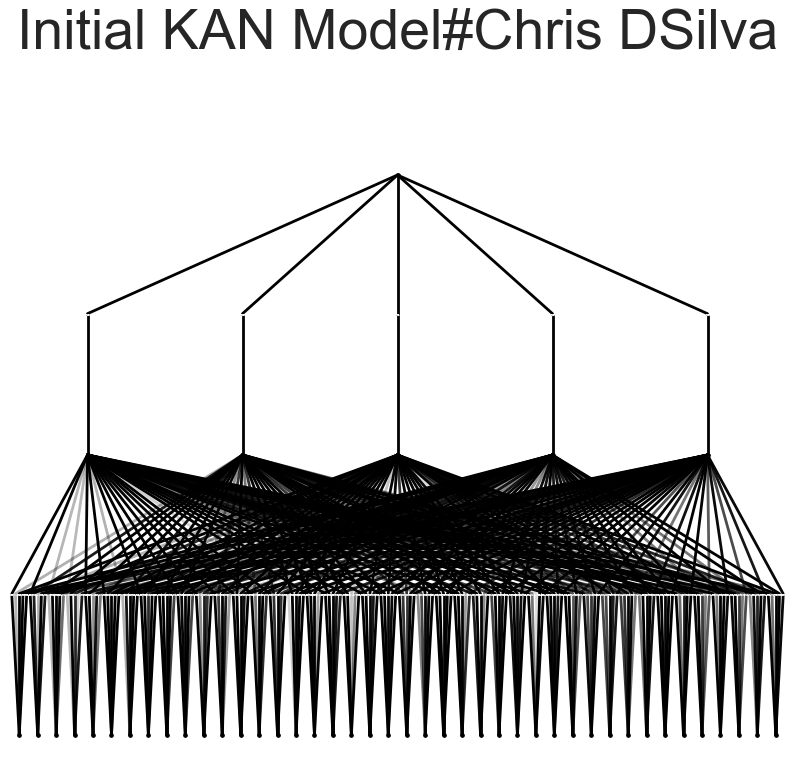

In [34]:
# Initial plot of the model
model(dataset['train_input'])  # Perform a forward pass to initialize
model.plot(beta=100, scale=1, title='Initial KAN Model#Chris DSilva')  # Adjust beta and scale as needed

In [35]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())


image_folder = 'video'

results = model.train(dataset, opt="LBFGS", steps=11, metrics=(train_acc, test_acc),save_fig=True, beta=7, img_folder=image_folder);
results['train_acc'][-1], results['test_acc'][-1]

train loss: 5.50e-03 | test loss: 2.69e-02 | reg: 2.20e+01 : 100%|██| 11/11 [10:06<00:00, 55.16s/it]


(1.0, 1.0)

In [36]:
import os
import numpy as np
import moviepy.video.io.ImageSequenceClip

image_folder = 'video'
video_name = 'video_regression'
fps = 1

files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)
image_files = [f"{image_folder}/{str(idx)}.jpg" for idx in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(f"{video_name}.mp4")

Moviepy - Building video video_regression.mp4.
Moviepy - Writing video video_regression.mp4



Moviepy - Done !
Moviepy - video ready video_regression.mp4


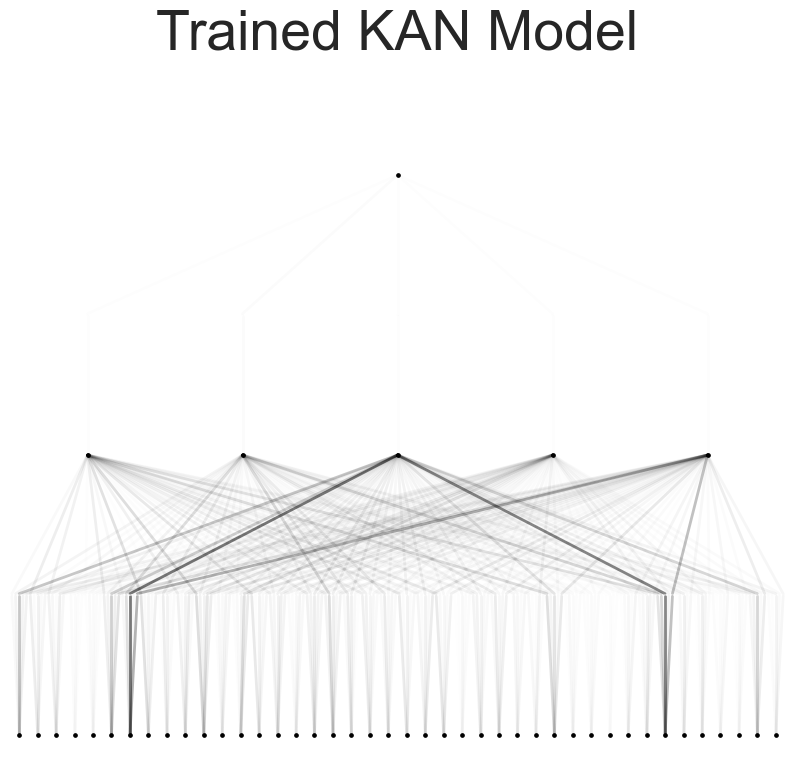

In [37]:

# Plot the model after training
model.plot(beta=2, scale=1, title='Trained KAN Model')


In [38]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]

fixing (0,0,0) with sin, r2=0.9999842047691345
fixing (0,0,1) with sin, r2=0.999934732913971
fixing (0,0,2) with tanh, r2=0.9970824718475342
fixing (0,0,3) with tanh, r2=0.9999916553497314
fixing (0,0,4) with tan, r2=0.9999980330467224
fixing (0,1,0) with sin, r2=0.9995830655097961
fixing (0,1,1) with abs, r2=0.9807761311531067
fixing (0,1,2) with tan, r2=0.9970936179161072
fixing (0,1,3) with tan, r2=0.9824582934379578
fixing (0,1,4) with tanh, r2=0.9993801712989807
fixing (0,2,0) with tan, r2=1.0000001192092896
fixing (0,2,1) with sin, r2=0.9999906420707703
fixing (0,2,2) with tan, r2=0.9999353289604187
fixing (0,2,3) with tanh, r2=0.9999926686286926
fixing (0,2,4) with tan, r2=0.999999463558197
fixing (0,3,0) with tanh, r2=0.9635863900184631
fixing (0,3,1) with tanh, r2=0.9887610673904419
fixing (0,3,2) with x^4, r2=0.891276478767395
fixing (0,3,3) with tan, r2=0.9829376339912415
fixing (0,3,4) with tanh, r2=0.9865369200706482
fixing (0,4,0) with tanh, r2=0.9999170303344727
fixing (

In [39]:

formula

-0.48*tanh(-0.e-2*(0.35 - x_8)**3 + 0.05*(0.43 - x_13)**2 + 0.02*(-0.65*x_21 - 1)**2 - 0.05*(-0.5*x_33 - 1)**2 + 0.06*(-0.2*x_37 - 1)**4 + 0.06*(-0.43*x_38 - 1)**2 + 0.04*exp(0.79*x_10) - 0.06*sin(0.53*x_12 + 4.97) + 0.1*sin(0.58*x_16 + 1.97) - 0.05*sin(1.01*x_20 + 2.4) - 0.12*sin(1.09*x_22 + 2.43) + 0.08*sin(0.99*x_24 - 4.01) - 0.39*sin(0.47*x_25 + 5.23) + 0.03*sin(2.07*x_27 - 5.43) + 0.14*sin(0.54*x_28 - 1.23) - 0.11*sin(0.79*x_29 - 3.79) + 0.03*sin(1.06*x_31 - 9.62) + 0.02*sin(1.46*x_32 + 9.18) - 0.17*sin(0.4*x_42 + 8.79) + 0.02*sin(1.27*x_5 - 7.2) - 0.02*sin(2.54*x_9 - 8.62) + 0.17*tan(6.94*x_17 - 6.8) - 0.19*tan(5.61*x_2 + 1.97) + 0.01*tan(2.99*x_3 - 1.81) - 0.33*tan(1.0*x_6 - 2.79) - 0.42*tanh(6.83*x_1 - 3.14) + 0.1*tanh(2.83*x_14 - 3.1) - 0.09*tanh(1.1*x_15 - 1.3) + 0.18*tanh(2.6*x_18 - 2.45) + 0.25*tanh(0.83*x_19 - 1.38) + 0.04*tanh(3.55*x_26 - 5.0) + 0.13*tanh(1.41*x_30 - 1.75) + 0.04*tanh(2.82*x_34 - 2.57) - 0.13*tanh(0.81*x_35 - 0.78) - 1.97*tanh(1.17*x_36 - 1.52) - 0.02*tan

In [40]:
import numpy as np
import sympy as sp

def acc(formula, X, y):
    batch = X.shape[0]
    correct = 0
    # Convert your formula to a function that can accept NumPy arrays
    formula_func = sp.lambdify([sp.symbols(f'x_{i+1}') for i in range(X.shape[1])], formula, "numpy")
    for i in range(batch):
        prediction = formula_func(*X[i])  # Calculate the formula result
        # Assuming y[i] is binary and prediction needs to be rounded for comparison
        correct += (np.round(prediction) == y[i])
    return correct / batch

# Assuming you have converted your dataset's input data to NumPy arrays suitable for the formula function
print('train acc of the formula:', acc(formula, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor([0.9779])
test acc of the formula: tensor([1.])


### Key Components

1. **Polynomial Terms**:
    - Terms like \((0.35 - x_{8})^3\), \((0.43 - x_{13})^2\), and \((-0.65 x_{21} - 1)^2\) capture non-linear relationships between features.
    - Higher-degree polynomials, like \((-0.2 x_{37} - 1)^4\), indicate more complex interactions.

2. **Exponential Terms**:
    - Exponential functions like \(e^{0.79 x_{10}}\) model multiplicative relationships, useful for capturing rapid growth or decay.

3. **Trigonometric Functions**:
    - Sine and tangent functions, such as \(\sin(0.53 x_{12} + 4.97)\) and \(\tan(6.94 x_{17} - 6.8)\), suggest periodic relationships in the data.

4. **Hyperbolic Tangent (tanh)**:
    - Tanh functions like \(\tanh(6.83 x_{1} - 3.14)\) introduce smooth, bounded non-linearity. This helps in handling outliers and compressing extreme values.

5. **Absolute Value**:
    - Absolute value terms like \(\left|7.28 x_{23} - 9.51\right|\) capture the magnitude of deviations from a central value.

### Interpretation

1. **Complexity**:
    - The formula is highly non-linear, suggesting that the regression model captures intricate patterns and relationships in the data.

2. **Feature Importance**:
    - Features such as \(x_{8}\), \(x_{13}\), \(x_{21}\), \(x_{33}\), \(x_{37}\), \(x_{38}\), and others are heavily involved, indicating their significance in the regression task.

3. **Interactions**:
    - The presence of multiple interaction terms (e.g., polynomial, trigonometric) indicates that the model captures complex interactions between features, which is crucial for accurate regression predictions.


# Visulizing this Model

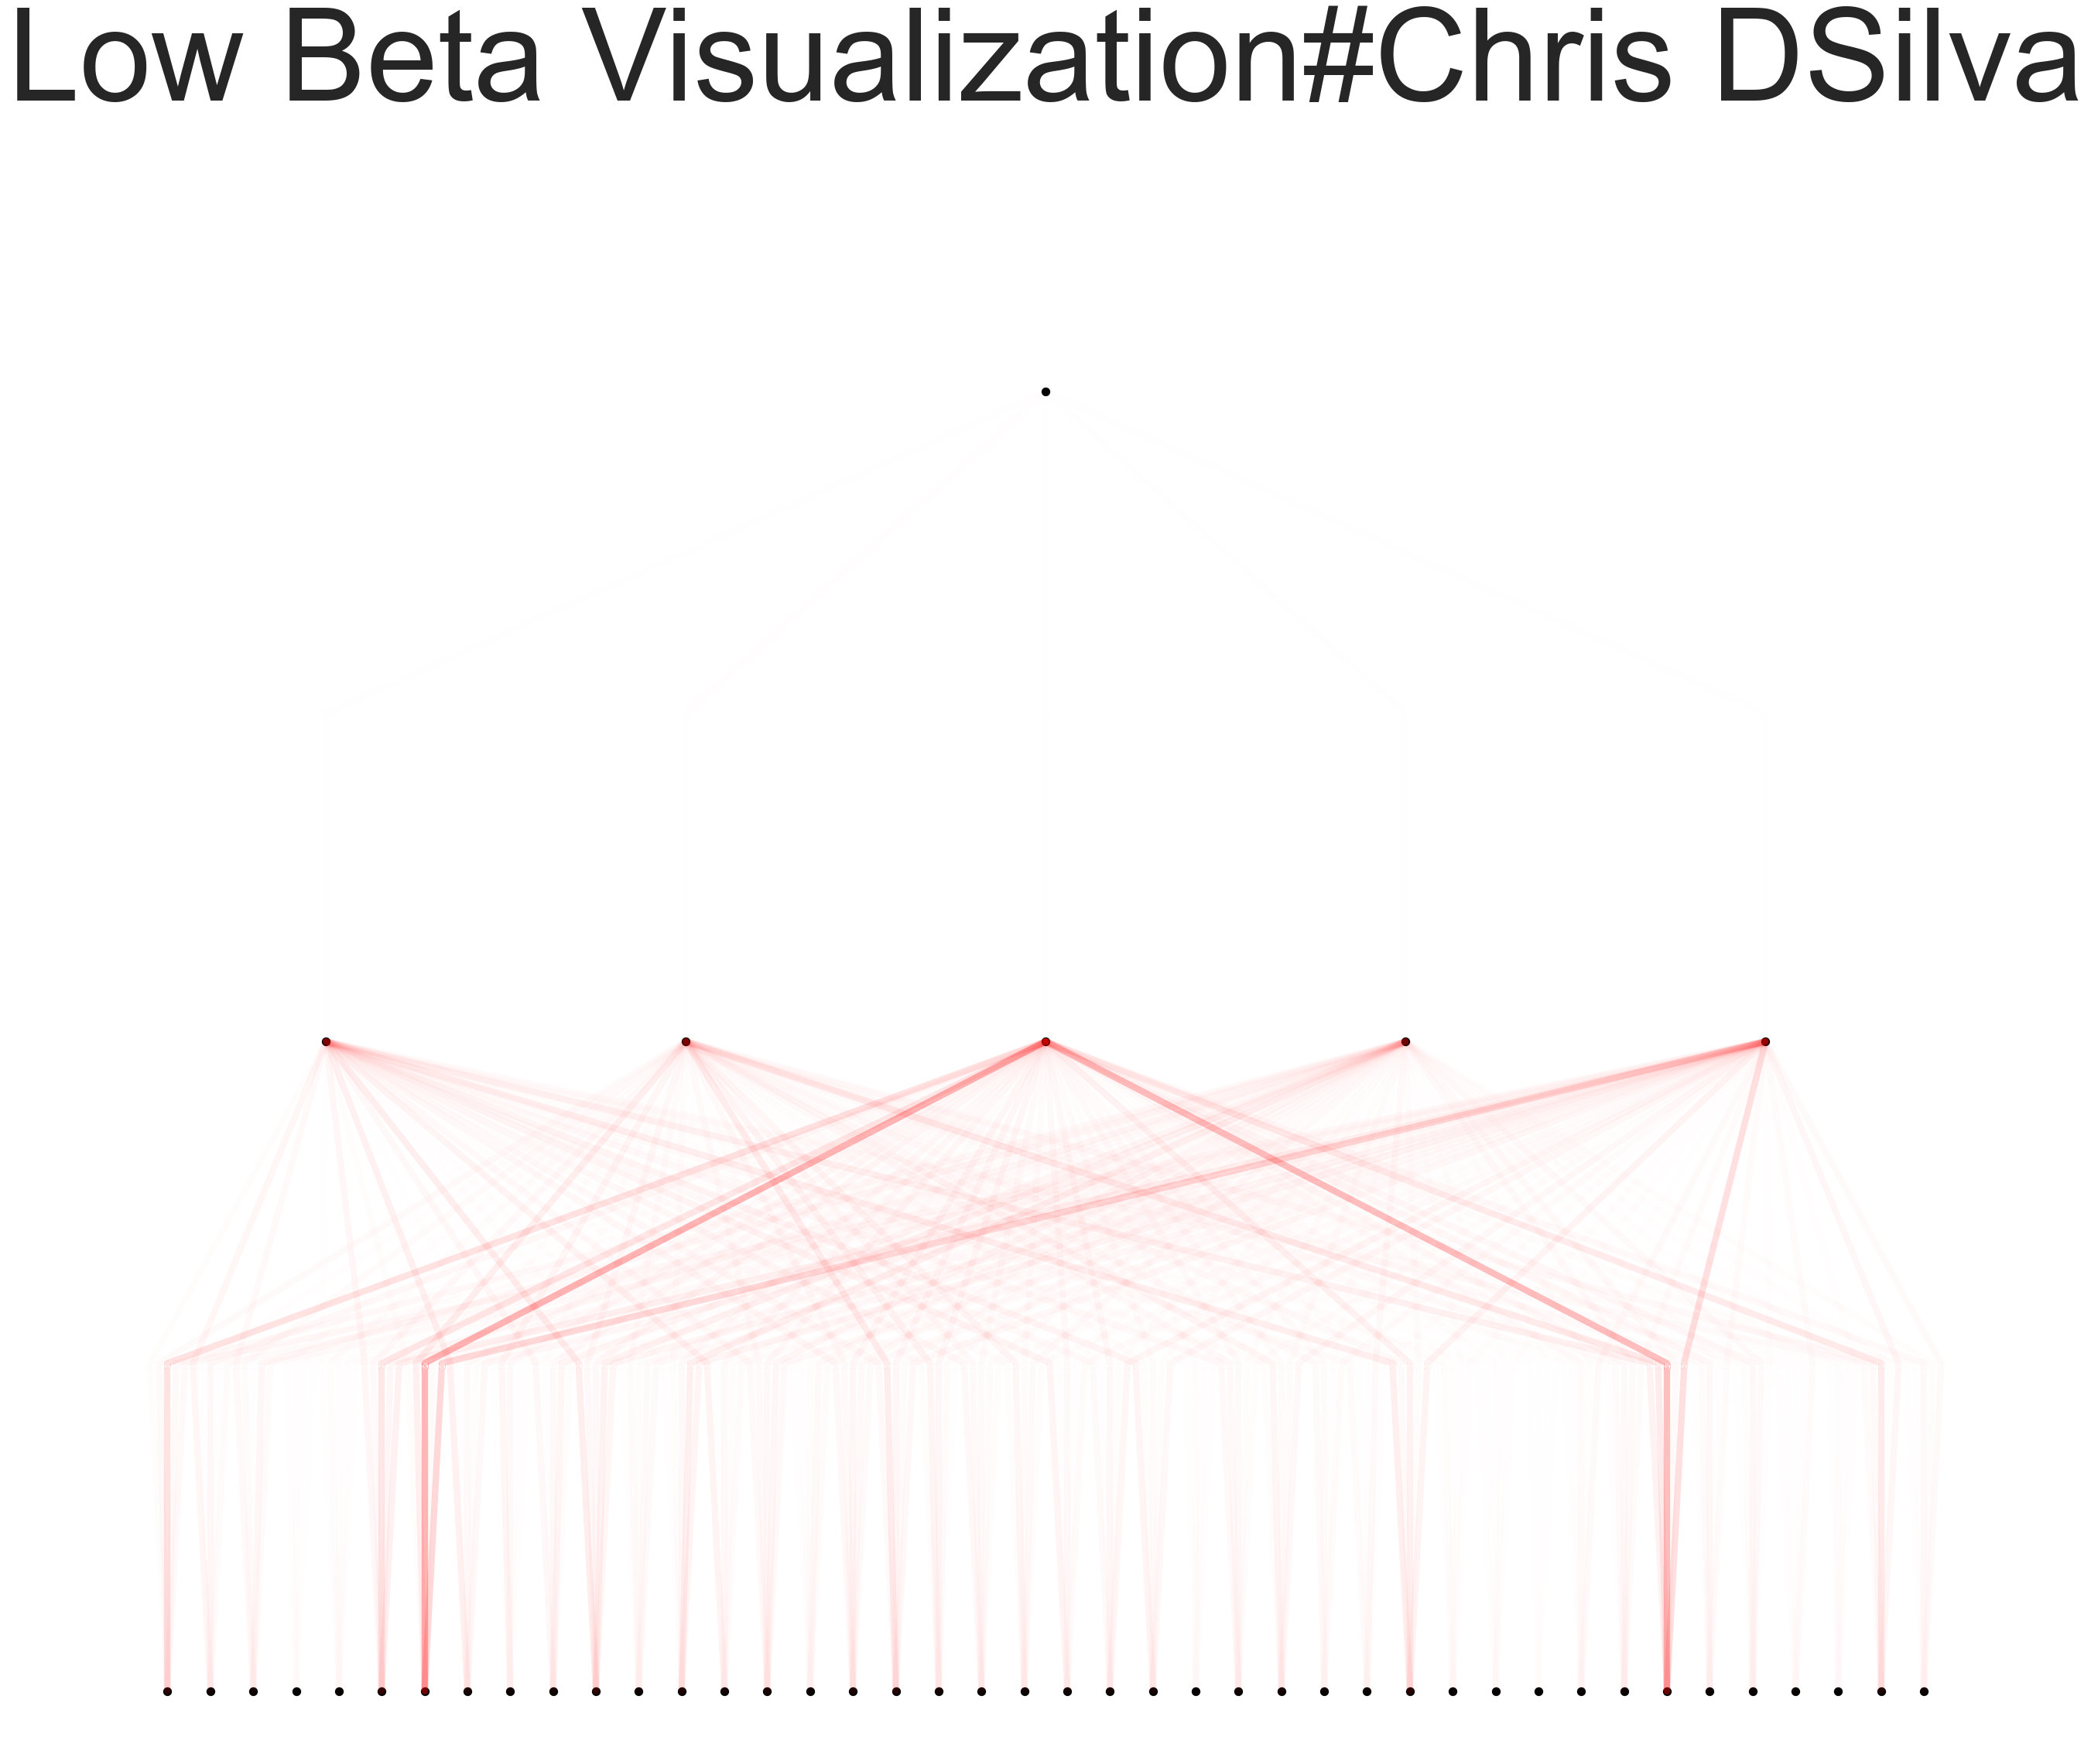

In [41]:
model.plot(beta=1, scale=3, title='Low Beta Visualization#Chris DSilva')

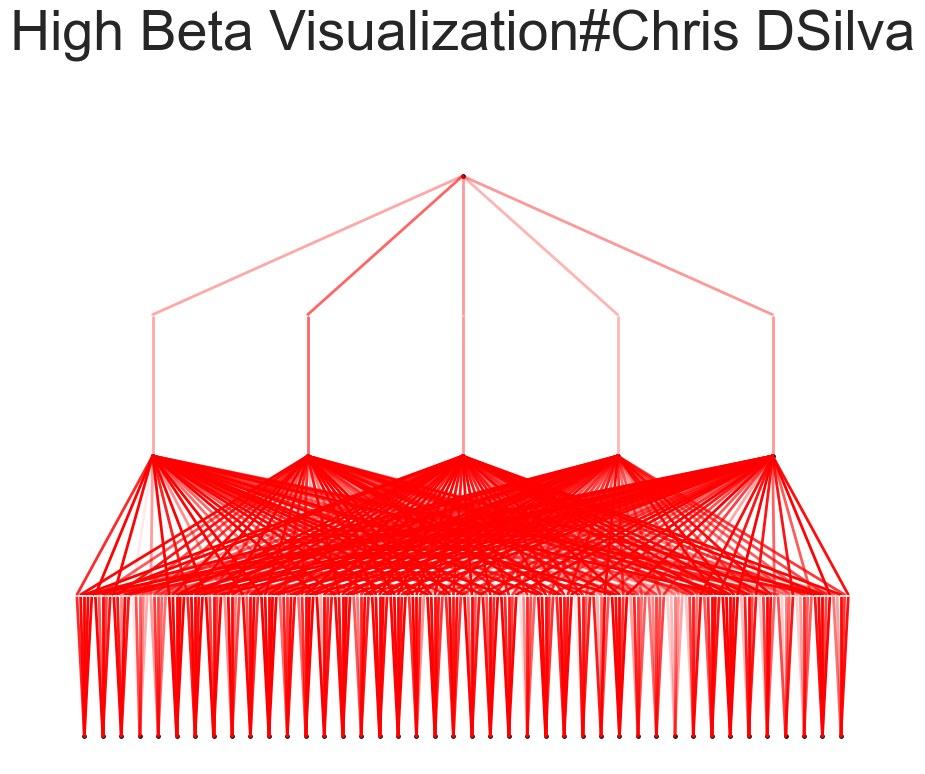

In [42]:

model.plot(beta=100, scale=1, title='High Beta Visualization#Chris DSilva')

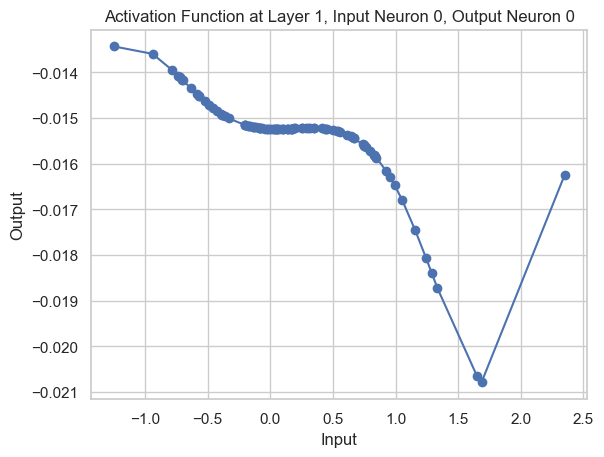

In [45]:
# Example: Extracting activation functions for a specific layer, input neuron, and output neuron
l = 1  # Layer index (first hidden layer)
i = 0  # Input neuron index in layer l (first input neuron in this case)
j = 0  # Output neuron index in layer l (first output neuron in this case)

# Extract inputs and outputs of the spline activation functions
inputs = model.spline_preacts[l][:, j, i]
outputs = model.spline_postacts[l][:, j, i]

# Sort the inputs and corresponding outputs for plotting
rank = np.argsort(inputs)
inputs = inputs[rank]
outputs = outputs[rank]

# Plot the activation function
plt.figure()
plt.plot(inputs, outputs, marker="o")
plt.title(f'Activation Function at Layer {l}, Input Neuron {i}, Output Neuron {j}')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()